<a href="https://colab.research.google.com/github/stevengiacalone/Python-workshop/blob/main/Session_3_Plotting_and_Databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

The first topic of today's session is plotting and visualization. We'll be using the popular package Matplotlib to explore a few different ways of plotting data. This tutorial is adapted from the official Matplotlib Pyplot tutorial, which can be found here: https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

Let's start by importing the package.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Plotting a line

We'll start with something simple and plot a straight line.

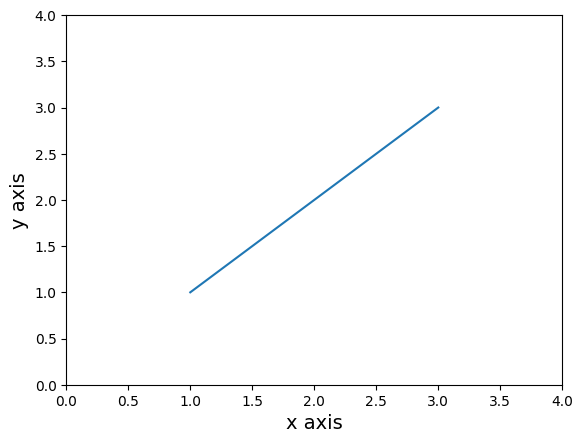

In [2]:
# first, we need some data to plot
x_data = np.array([1,2,3])
y_data = np.array([1,2,3])

# this function adds the data to the plot
plt.plot(x_data, y_data)

# these functions define the axis labels - you can make them anything
plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

# these functions define the x and y limits of the plot
# if omitted, matplotlib will automatically set the limits
plt.xlim([0,4])
plt.ylim([0,4])

# this function will tell Python to display the plot
plt.show()

We can edit the format of the line using a number of keywords in the .plot() function. This is especially useful when you have multiple lines on the same plot and want to distinguish them.

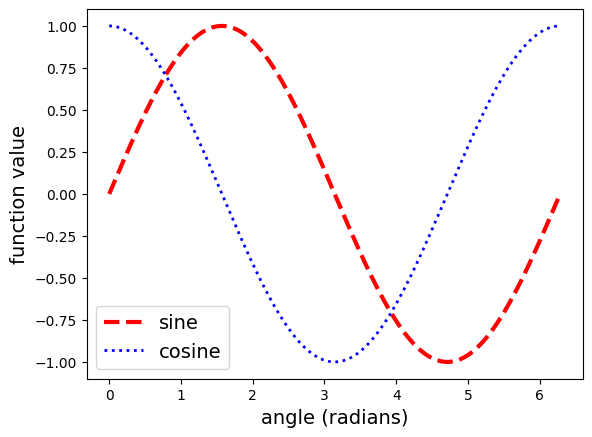

In [3]:
x_data = np.linspace(0, 2*np.pi, 1000)
y_data_sin = np.sin(x_data)
y_data_cos = np.cos(x_data)

plt.plot(x_data, y_data_sin, color="red", linestyle="--", linewidth=3, label="sine")
plt.plot(x_data, y_data_cos, color="blue", linestyle=":", linewidth=2, label="cosine")

plt.xlabel("angle (radians)", fontsize=14)
plt.ylabel("function value", fontsize=14)

# the legend function adds the labels defined above to the plot
plt.legend(loc="lower left", fontsize=14)

plt.show()

#### Plotting a scatterplot

You can also plot a scatter plot using the .scatter() function instead of the .plot() function.

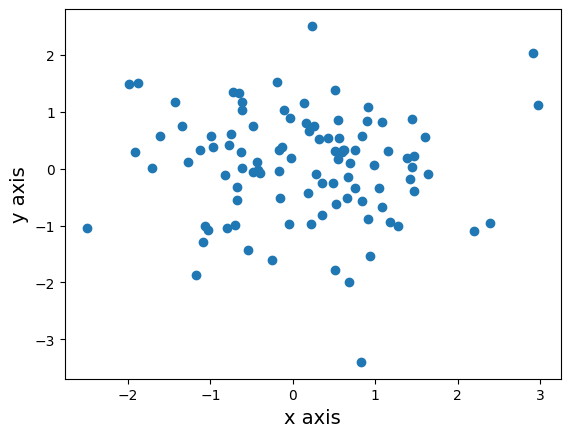

In [4]:
# draw a random sample from a Gaussian distribution for x and y
x_data = np.random.normal(loc=0, scale=1, size=100)
y_data = np.random.normal(loc=0, scale=1, size=100)

plt.scatter(x_data, y_data)

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

You can set the sizes, colors, and shapes of the points to add even more information.

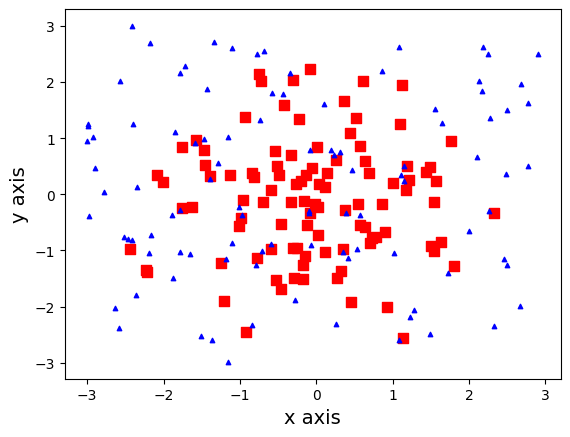

In [5]:
# draw a random sample from a Gaussian distribution for x and y
x_data1 = np.random.normal(loc=0, scale=1, size=100)
y_data1 = np.random.normal(loc=0, scale=1, size=100)

# draw a random sample from a uniform distribution for x and y
x_data2 = np.random.uniform(low=-3, high=3, size=100)
y_data2 = np.random.uniform(low=-3, high=3, size=100)

plt.scatter(x_data1, y_data1, s=50, c="red", marker="s")
plt.scatter(x_data2, y_data2, s=10, c="blue", marker="^")

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

You can also have the points of a given data set change in size or color based on another array of values. For example, we will plot a linear set of points but have them grow in size like x$^3$ We will also have them change in color based on the x value.

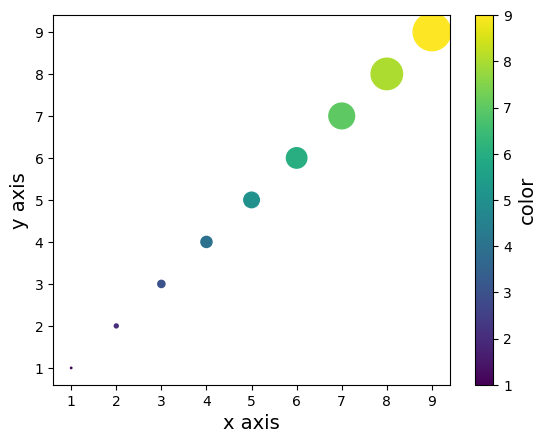

In [6]:
x_data = np.arange(1,10)
y_data = np.arange(1,10)
size_data = x_data**3

plt.scatter(x_data, y_data, s=size_data, c=x_data, marker="o")

# we can add a colorbar to display what the colors mean
plt.colorbar().set_label(label="color", fontsize=14)

plt.xlabel("x axis", fontsize=14)
plt.ylabel("y axis", fontsize=14)

plt.show()

#### Plotting a histogram

Histograms are useful to displaying how data is distributed. Let's start by plotting a basic Gaussian distribution.

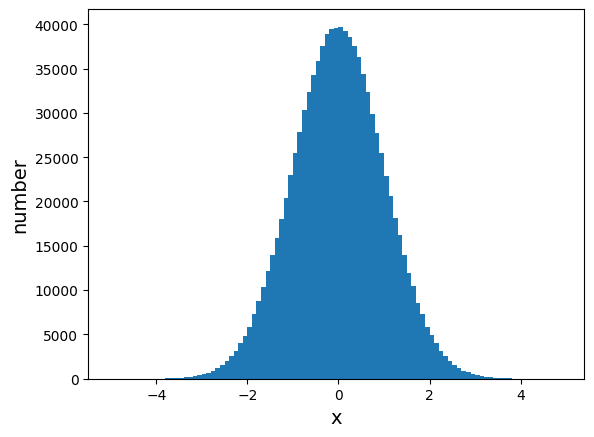

In [7]:
# draw samples from a Gaussian distribution (i.e., a bell curve)
data = np.random.normal(loc=0, scale=1, size=1000000) # loc is the mean and scale is the standard deviation of the distribution

plt.hist(data, bins=np.arange(-5,5,0.1))

plt.xlabel("x", fontsize=14)
plt.ylabel("number", fontsize=14)

plt.show()

Using NumPy, we can determine the locations of the 68th, 95th, and 99.7th percentiles (i.e., $1 \sigma$, $2 \sigma$, and $3 \sigma$ from the mean). Let's do that and plot them on top of the distribution.

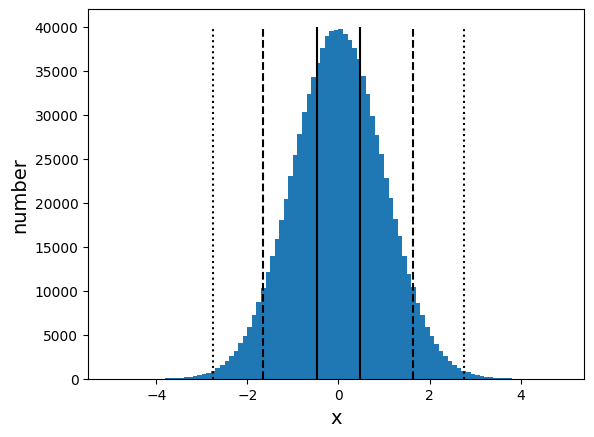

In [8]:
onesig = np.percentile(data, q=[32, 68])
twosig = np.percentile(data, q=[5, 95])
threesig = np.percentile(data, q=[0.3, 99.7])

plt.hist(data, bins=np.arange(-5,5,0.1))
plt.vlines(x=onesig, ymin=0, ymax=40000, color="k", linestyle="-")
plt.vlines(x=twosig, ymin=0, ymax=40000, color="k", linestyle="--")
plt.vlines(x=threesig, ymin=0, ymax=40000, color="k", linestyle=":")

plt.xlabel("x", fontsize=14)
plt.ylabel("number", fontsize=14)

plt.show()

Lastly, let's plot the probability distribution function (PDF) and cumulative distribution function (CDF) of the Gaussian distribution above. This concept will come up again in future sessions.

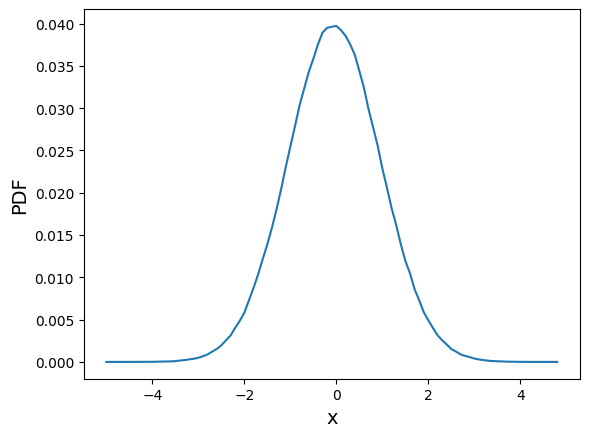

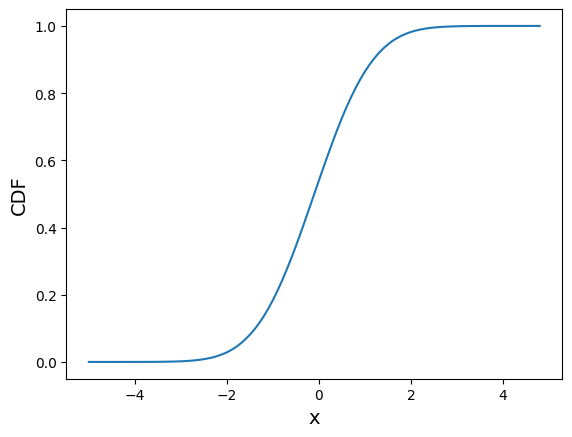

In [9]:
counts, hist_bins = np.histogram(data, bins=np.arange(-5,5,0.1))
PDF = counts/np.sum(counts)
CDF = np.cumsum(PDF)

plt.plot(hist_bins[:-1], PDF)
plt.xlabel("x", fontsize=14)
plt.ylabel("PDF", fontsize=14)
plt.show()


plt.plot(hist_bins[:-1], CDF)
plt.xlabel("x", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.show()

#### Plotting multi-panel figures

We can make a multi-panel figure using the .subplots() function. In the following example, we will make a 2x2 figure (4 plots in total).

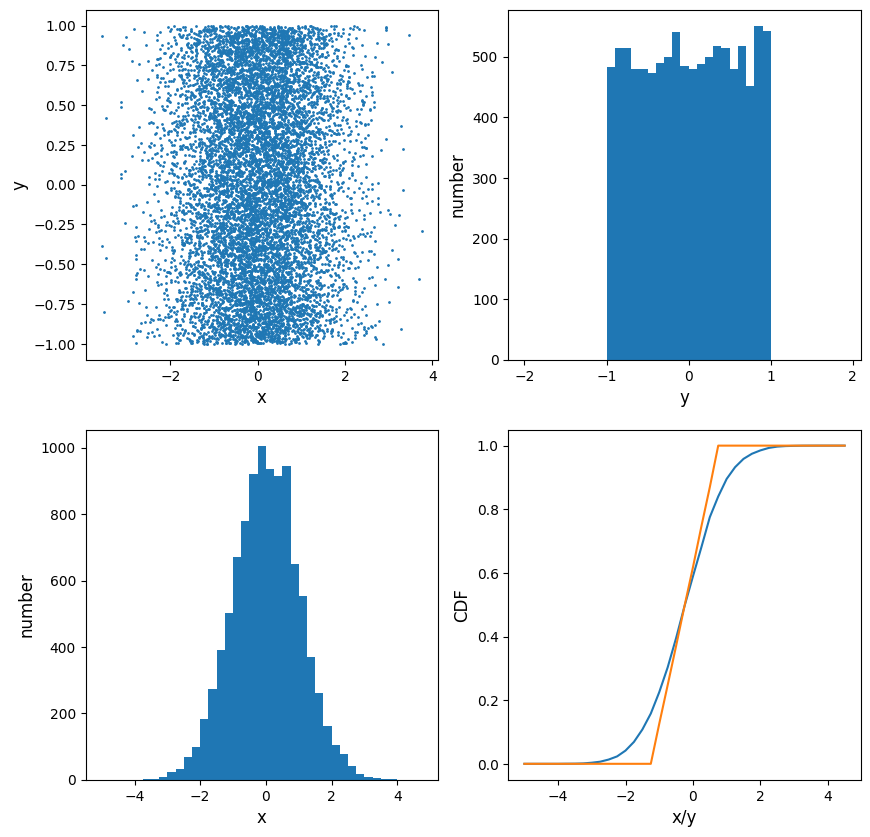

In [10]:
# first, define some data
x_data = np.random.normal(loc=0, scale=1, size=10000)
y_data = np.random.uniform(low=-1, high=1, size=10000)

# first, define the figure and the number of rows/columns
fig, ax = plt.subplots(2, 2, figsize=(10,10))

# plot a scatterplot of the data in the first panel (index 0,0)
ax[0,0].scatter(x_data, y_data, s=1)
ax[0,0].set_xlabel("x", fontsize=12)
ax[0,0].set_ylabel("y", fontsize=12)

# in the second panel, plot of histogram of the y data (index 0,1)
ax[0,1].hist(y_data, bins=np.arange(-2,2,0.1))
ax[0,1].set_xlabel("y", fontsize=12)
ax[0,1].set_ylabel("number", fontsize=12)

# in the third panel, plot of histogram of the x data (index 1,0)
ax[1,0].hist(x_data, bins=np.arange(-5,5,0.25))
ax[1,0].set_xlabel("x", fontsize=12)
ax[1,0].set_ylabel("number", fontsize=12)

# in the fourth panel, plot the CDFs of the x and y data together (index 1,1)
x_count, x_hist_bins = np.histogram(x_data, bins=np.arange(-5,5,0.25))
x_CDF = np.cumsum(x_count/np.sum(x_count))
y_count, y_hist_bins = np.histogram(y_data, bins=np.arange(-5,5,0.25))
y_CDF = np.cumsum(y_count/np.sum(y_count))
ax[1,1].plot(x_hist_bins[:-1], x_CDF)
ax[1,1].plot(y_hist_bins[:-1], y_CDF)
ax[1,1].set_xlabel("x/y", fontsize=12)
ax[1,1].set_ylabel("CDF", fontsize=12)

plt.show()

#### Plotting in 3D

Plotting in 3D comes in handy when, well, our data has 3 dimension! Let's see an example of how it's done (we'll use this later in the notebook). More examples can be found here: https://matplotlib.org/stable/gallery/mplot3d/index.html

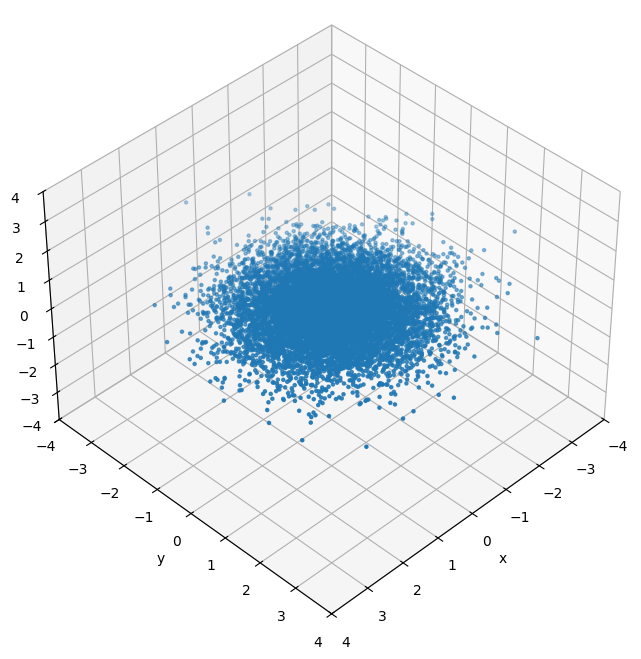

In [11]:
# define some 3D data
x_data = np.random.normal(loc=0, scale=1, size=10000)
y_data = np.random.normal(loc=0, scale=1, size=10000)
z_data = np.random.normal(loc=0, scale=0.1, size=10000)

# define the figure and add an extra axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot it just as you would a normal scatterplot
ax.scatter(x_data, y_data, z_data, marker=".")

# set the viewing angle with the following
ax.view_init(azim=45, elev=40)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])

plt.show()

# Pandas

Next, we'll do a brief crash course of Pandas, a Python databasing and data analysis library. More details on Pandas can be found here: https://pandas.pydata.org/docs/user_guide/10min.html

The most important feature of Pandas as the DataFrame object. DataFrames allow us to easily store, access, and manipulate data in large tables. Let's make a DataFrame and see how we work with it.

In [12]:
import pandas as pd

In [13]:
# dictionaries can be saved as DataFrames
# let's make a dictionary containing the ages, heights, and favorite numbers of 100 people
this_dict = {"age": np.random.uniform(low=21, high=81, size=100),
             "height": np.random.normal(loc=180, scale=10, size=100),
             "fave_number": np.random.randint(low=0, high=10, size=100)}

# now convert it to a DataFrame with Pandas
df = pd.DataFrame(this_dict)

# let's see how it looks
df

,age,height,fave_number
0,58.138856,196.144930,1
1,21.113182,208.228186,4
2,29.165692,174.644533,0
3,35.383756,168.924938,4
4,21.977405,194.701536,4
...,...,...,...
95,54.887828,181.067967,7
96,61.655611,182.520223,5
97,70.794597,178.213876,8
98,29.494962,187.030006,0


You can access specific columns as numpy arrays like so

In [14]:
ages = df["age"].values
heights = df["height"].values
fave_numbers = df["fave_number"].values

print(ages)

[58.138856   21.11318199 29.16569243 35.38375565 21.97740463 69.19220746
 48.38370772 42.45495622 23.39331693 55.135117   34.41783553 29.32391895
 78.5961811  45.84621964 62.68100581 75.62836264 46.46195406 46.04692631
 24.1194434  79.50863161 23.47551867 49.72016415 31.46180245 48.90821756
 28.73000778 70.78713774 31.49228754 40.31420486 22.13710595 75.80033192
 56.00639956 22.77844065 24.8024101  57.14941409 53.6433971  68.23743487
 24.20399519 24.85914214 51.57546248 64.49569129 44.43858737 66.78483393
 79.38264176 41.43348826 52.84560756 42.46170048 80.17401638 51.06639533
 27.56657523 56.97945874 72.27381985 23.9927424  44.43541415 66.14977326
 76.92111273 63.21554075 74.12917235 59.1448895  60.87901086 42.36447405
 61.84063397 48.04534786 38.09370504 80.06123037 42.41522264 52.49351193
 45.31903131 57.28200025 79.3016444  24.98589774 80.43440262 24.07457096
 70.39014331 43.87553201 29.56302334 61.46637509 27.3738731  60.47517825
 24.49587644 67.76330958 69.47762487 31.95857927 37

You can return the data for a specific row using .loc

In [15]:
this_person = df.iloc[10] # row 10
this_person

,10
age,34.417836
height,169.062688
fave_number,8.000000


You can filter data using normal boolean masking methods. Let's say we want a new DataFrame only containing people older than 50 years.

In [16]:
df2 = df[df["age"].values > 50]
df2

,age,height,fave_number
0,58.138856,196.144930,1
5,69.192207,170.042903,4
9,55.135117,178.365681,8
12,78.596181,181.365732,2
14,62.681006,180.403170,0
15,75.628363,192.268280,0
19,79.508632,186.011727,2
25,70.787138,169.544358,2
29,75.800332,176.667739,5
30,56.006400,182.362201,5


You can return some basic statistics from the dataframe using the .describe() method.

In [17]:
df.describe()

,age,height,fave_number
count,100.000000,100.000000,100.000000
mean,49.894411,180.581544,4.090000
std,18.079260,9.419891,2.796444
min,21.113182,157.544234,0.000000
25%,31.842006,174.105767,2.000000
50%,51.320929,180.127384,4.000000
75%,64.708942,187.206339,6.000000
max,80.434403,208.228186,9.000000


In [18]:
df2.describe()

,age,height,fave_number
count,51.000000,51.000000,51.000000
mean,65.111556,179.586673,3.627451
std,8.956910,7.970180,2.856297
min,51.066395,163.018808,0.000000
25%,57.215707,173.863190,1.000000
50%,64.495691,179.578265,4.000000
75%,71.484359,184.348864,6.000000
max,80.434403,196.144930,9.000000


We're going to stop there in the interest of time, but know that there is much more that can be done with Pandas! If you want to become a data scientists, Pandas proficiency will be essential during the interview process.

# Exercise

Now let's put it all together. In this exercise, we're going to query data from Gaia to identify and plot the Hyades cluster - a 625 million-year-old open stellar cluster approximately 150 lightyears away from the Solar System. Gaia is a European Space Agency mission that is measuring the 3D locations, motions, and properties of over one billion (!) stars in the Milky Way galaxy -- essentially creating the most accurate map of our galaxy ever created. This mission has enabled countless of new studies and discoveries, with many more to come in the next decade. If you want to learn more about Gaia, here is a good summary video from the PBS Space Time YouTube channel: https://www.youtube.com/watch?v=Jdy09y0A4t0

First, we need to query and download the data. Do do so, run the cells below. It will take a few minutes, but by the time it's done you will have a dataframe with nearly 100,000 stars.

This file contains the coordinates, parallaxes (which can be converted to distance), and proper motions (motions on the plane of the sky) for the brightest stars within 6 degrees of the center of Hyades (Right Ascension = 67.447 degrees, Declination = 16.948 degrees).

In [19]:
pip install astroquery astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00


In [20]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

# Define the center of the Hyades cluster
hyades_center = SkyCoord(ra=66.75*u.deg, dec=15.87*u.deg, frame='icrs')

# Gaia DR3 catalog name
gaia_table = "gaiaedr3.gaia_source"

# Construct the ADQL query
query = f"""
SELECT *
FROM {gaia_table}
WHERE phot_g_mean_mag < 16
AND 1 = CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', {hyades_center.ra.deg}, {hyades_center.dec.deg}, 6)
)
"""

# Launch the query (asynchronous allows for larger datasets)
job = Gaia.launch_job_async(query)
results = job.get_results()

df = results.to_pandas()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


Here is a brief description of the columns we care about:
- designation: The source ID of the star and the data release (DR) the data corresponds to.
- source_id: The identified of the star in the Gaia catalogue.
- ra: The right ascention of the star (in degrees).
- dec: The declination of the star (in degrees).
- parallax: The parallax of the star (1/parallax is distance in parsecs).
- pmra: The proper motion of the star in the RA direction (in milli-arcseconds per year).
- pmdec: The proper motion of the star in the Dec direction (in milli-arcseconds per year).
- phot_g_mean_mag: The apparent G magnitude of the star (i.e., the apparent brightness of the star as measured using the G filter).
- phot_bp_mean_mag: The apparent BP magnitude of the star.
- phot_rp_mean_mag: The apparent RP magnitude of the star.

Let's start by pruning the dataframe to get rid of stars that don't have coordinates, proper motions, or parallaxes. It turns out that in this case, no stars will be removed, but this is a useful method to know in any case.

In [22]:
df = df.dropna(subset=["ra", "dec", "pmra", "pmdec", "parallax"])
df

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
0,1636042515805110273,Gaia EDR3 45903171646979072,45903171646979072,84597843,2016.0,62.374160,0.040014,16.647034,0.025436,0.449102,...,NaN,NaN,0,NaN,NaN,NaN,176.462712,-25.022973,63.544047,-4.290970
1,1636042515805110273,Gaia EDR3 45903549604109184,45903549604109184,225872416,2016.0,62.282005,0.037495,16.618684,0.027555,0.806382,...,NaN,NaN,0,NaN,NaN,NaN,176.421252,-25.107767,63.451765,-4.302472
2,1636042515805110273,Gaia EDR3 45903583963848320,45903583963848320,1616775635,2016.0,62.257891,0.033468,16.619423,0.025504,0.482539,...,NaN,NaN,0,NaN,NaN,NaN,176.403660,-25.124522,63.429134,-4.297457
4,1636042515805110273,Gaia EDR3 45036103649325696,45036103649325696,874724449,2016.0,61.873575,0.034855,14.505380,0.023992,0.876878,...,NaN,NaN,0,NaN,NaN,NaN,177.893383,-26.801584,62.666517,-6.304860
5,1636042515805110273,Gaia EDR3 45036619045396480,45036619045396480,966912282,2016.0,61.909082,0.042184,14.543639,0.031538,0.853878,...,NaN,NaN,0,NaN,NaN,NaN,177.886473,-26.750525,62.707734,-6.273769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75066,1636042515805110273,Gaia EDR3 145279059790604032,145279059790604032,780192337,2016.0,66.588542,0.036102,21.203517,0.022065,0.093534,...,NaN,NaN,0,NaN,NaN,NaN,175.593852,-19.023452,68.256886,-0.485964
75067,1636042515805110273,Gaia EDR3 145279128510081024,145279128510081024,59827128,2016.0,66.573402,0.027148,21.212483,0.016562,0.824697,...,NaN,NaN,0,NaN,NaN,NaN,175.576933,-19.028325,68.244366,-0.474879
75068,1636042515805110273,Gaia EDR3 145280056223021568,145280056223021568,888985544,2016.0,66.473141,0.026535,21.245562,0.016343,0.760768,...,NaN,NaN,0,NaN,NaN,NaN,175.485953,-19.077654,68.157329,-0.427408
75069,1636042515805110273,Gaia EDR3 145280090582756864,145280090582756864,887058973,2016.0,66.492731,0.024627,21.257954,0.014974,0.980813,...,NaN,NaN,0,NaN,NaN,NaN,175.488609,-19.055732,68.177322,-0.418071


#### Task 1: Removing unassociated stars.

Hyades only contains about 500 stars, but our DataFrame above has many more. This means there are likely some stars in the DataFrame that are not actually members of the Hyades cluster. Using histograms and scatter plots, locate and remove stars that are unlikely to actually be Hyades members. Note that all stars in the cluster should have roughly the same proper motions.

Try it yourself first, then "unhide" the cells below to reveal the solution.

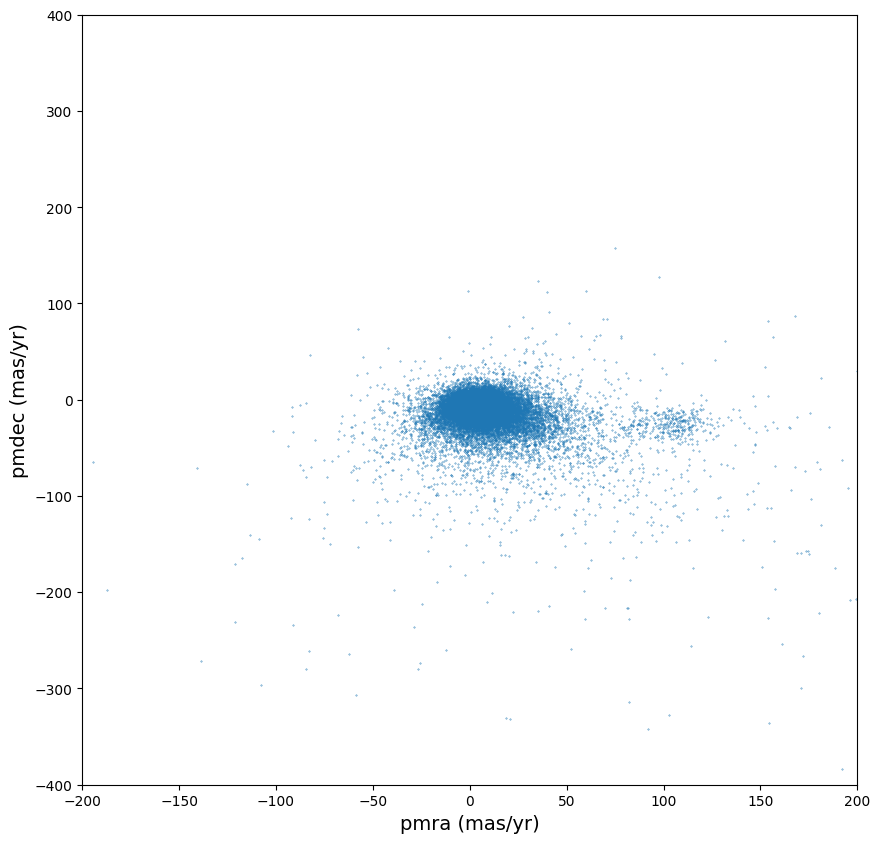

In [23]:
pmra_data = df["pmra"].values
pmdec_data = df["pmdec"].values

plt.figure(figsize=(10,10))

plt.scatter(pmra_data, pmdec_data, s=0.1)
plt.xlim([-200,200])
plt.ylim([-400,400])
plt.xlabel("pmra (mas/yr)", fontsize=14)
plt.ylabel("pmdec (mas/yr)", fontsize=14)

plt.show()

We can see that there's a little bubble on of stars with pmra around 100 mas/yr. Those are the cluster members! Let's cut out all of the non-member stars.

In [24]:
df = df[
    (df["pmra"].values > 75) & (df["pmra"].values < 150) &
    (df["pmdec"].values > -75) & (df["pmdec"].values < 75)
    ]
df

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
10,1636042515805110273,Gaia EDR3 45038302672569984,45038302672569984,725366940,2016.0,61.963984,0.043915,14.580503,0.029565,5.904528,...,NaN,NaN,0,NaN,NaN,NaN,177.894559,-26.686256,62.767217,-6.247567
20,1636042515805110273,Gaia EDR3 45041498128248576,45041498128248576,869303463,2016.0,61.746945,0.015699,14.598713,0.010566,5.386312,...,87.111275,0.255582,7,6250.0,4.5,0.0,177.724214,-26.832248,62.563188,-6.190041
260,1636042515805110273,Gaia EDR3 45117226991576448,45117226991576448,49695067,2016.0,61.690179,0.039335,15.066567,0.024523,4.132925,...,NaN,NaN,0,NaN,NaN,NaN,177.290715,-26.564084,62.598151,-5.720265
322,1636042515805110273,Gaia EDR3 45142202225729024,45142202225729024,53691006,2016.0,61.924827,0.045909,15.161949,0.024304,23.045802,...,NaN,NaN,0,NaN,NaN,NaN,177.378323,-26.331143,62.839811,-5.669381
323,1636042515805110273,Gaia EDR3 45142206521351552,45142206521351552,36940397,2016.0,61.925521,0.027922,15.162686,0.016121,22.850537,...,37.932079,0.465525,9,6750.0,4.5,0.0,177.378201,-26.330153,62.840612,-5.668783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73847,1636042515805110273,Gaia EDR3 144574788234755200,144574788234755200,1572902128,2016.0,67.932201,0.044116,21.154464,0.022748,16.342155,...,NaN,NaN,0,NaN,NaN,NaN,176.487116,-18.098728,69.487413,-0.727084
73848,1636042515805110273,Gaia EDR3 144574788234755584,144574788234755584,1379108045,2016.0,67.930710,0.042338,21.153082,0.022283,16.482431,...,NaN,NaN,0,NaN,NaN,NaN,176.487294,-18.100680,69.485831,-0.728243
74267,1636042515805110273,Gaia EDR3 144663157183364864,144663157183364864,318147267,2016.0,67.406359,0.017477,21.668437,0.009208,23.436976,...,NaN,NaN,0,NaN,NaN,NaN,175.741693,-18.142542,69.081157,-0.145026
74270,1636042515805110273,Gaia EDR3 144663814316653824,144663814316653824,65915000,2016.0,67.452656,0.017045,21.734022,0.009350,23.856825,...,37.522728,0.731090,21,4000.0,3.0,0.0,175.718303,-18.067325,69.133682,-0.086777


Looks like we got rid of a lot of stars that are unlikely to be members. Let's plot the pmra and pmdec distributions and see how they look.

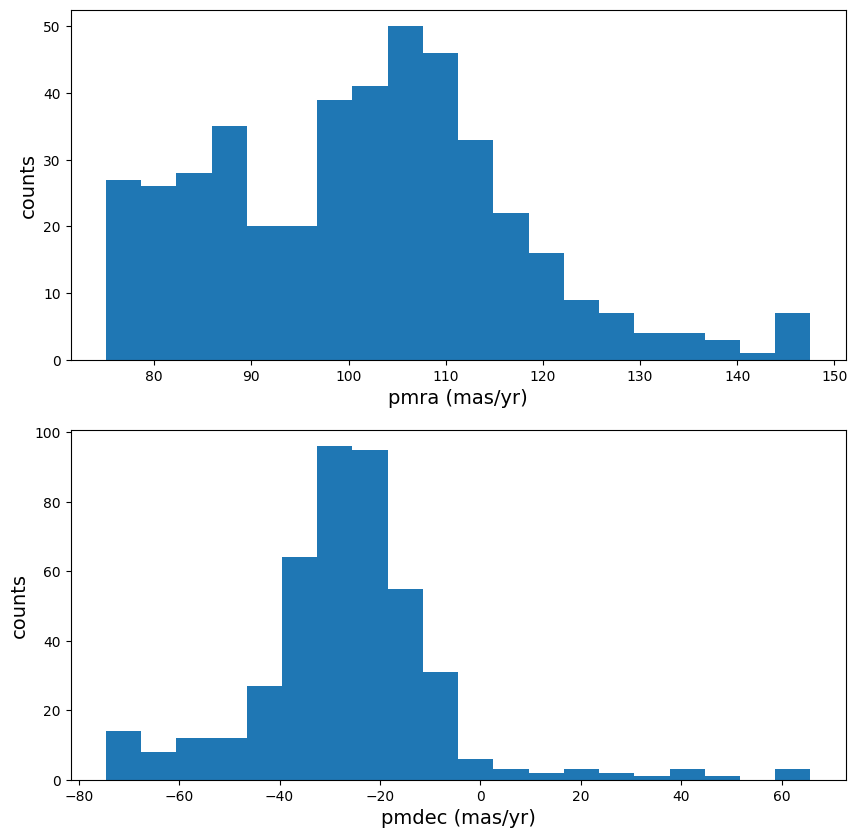

In [25]:
pmra_data = df["pmra"].values
pmdec_data = df["pmdec"].values

fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].hist(pmra_data, bins=20)
ax[0].set_xlabel("pmra (mas/yr)", fontsize=14)
ax[0].set_ylabel("counts", fontsize=14)

ax[1].hist(pmdec_data, bins=20)
ax[1].set_xlabel("pmdec (mas/yr)", fontsize=14)
ax[1].set_ylabel("counts", fontsize=14)

plt.show()

#### Task 2: Plotting the color-magnitude diagram.

Color-magnitude diagrams are used to calculate the ages and average metallicities of stellar clusters (by comparing against stellar evolution models). Make a scatter plot with the following: BP-RP on the x axis and M_g on the y axis. What does the plot look like? We'll discuss the answer together afterwards.

Note that M_G is the absolute magnitude of the star in the G filter. This is calculated using the following equation:

M_G = G + 5 + 5*log10(parallax/1000)

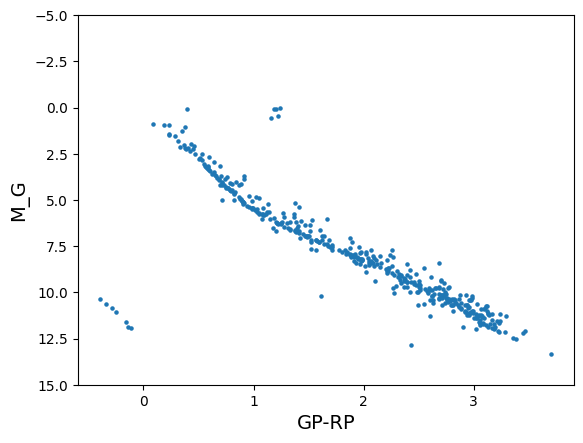

In [26]:
G_data = df["phot_g_mean_mag"].values
parallax = df["parallax"].values
M_G = G_data + 5 + 5*np.log10(parallax/1000)
BP_data = df["phot_bp_mean_mag"].values
RP_data = df["phot_rp_mean_mag"].values

plt.scatter(BP_data-RP_data, M_G, s=5)

plt.xlabel("GP-RP", fontsize=14)
plt.ylabel("M_G", fontsize=14)

plt.ylim([15,-5])
plt.show()

#### Task 3: Plotting the cluster in 3D space.

Lastly, let's plot the cluster in 3D using the RA, Dec, and distances from the DataFrame.

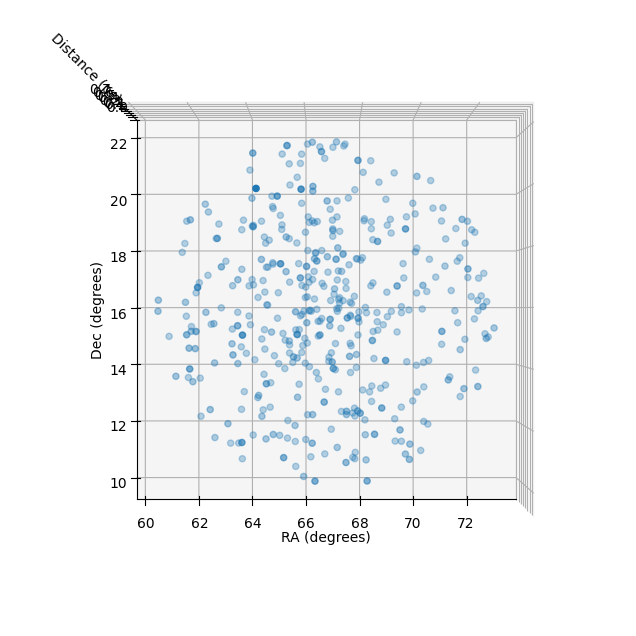

In [27]:
ra_data = df["ra"].values
dec_data = df["dec"].values
distance_data = 1/df["parallax"].values

# define the figure and add an extra axis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot it just as you would a normal scatterplot
ax.scatter(ra_data, dec_data, distance_data)

# set the viewing angle with the following
ax.view_init(azim=-90, elev=90)

ax.set_xlabel('RA (degrees)')
ax.set_ylabel('Dec (degrees)')
ax.set_zlabel('Distance (pc)')

plt.show()